<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [VAE2] - Variational AutoEncoder (VAE) with MNIST - Analysis
<!-- DESC --> Episode 2 : Exploring our latent space
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - First data generation from **latent space** 
 - Understanding of underlying principles
 - Model management

Here, we don't consume data anymore, but we generate them ! ;-)

## What we're going to do :

 - Load a saved model
 - Reconstruct some images
 - Latent space visualization
 - Matrix of generated images


## Step 1 - Init python stuff

In [1]:
import numpy as np
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import scipy.stats
import sys, importlib

import matplotlib
import matplotlib.pyplot as plt

from modules.VAE          import VAE
from modules.loader_MNIST import Loader_MNIST

sys.path.append('..')
import fidle.pwk as pwk


run_dir = './run/MNIST.001'
datasets_dir = pwk.init('VAE2', run_dir)

**FIDLE 2020 - Practical Work Module**

Version              : 0.6.1 DEV
Notebook id          : VAE2
Run time             : Tuesday 29 December 2020, 18:07:40
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run/MNIST.001
Running mode         : full
Update keras cache   : False
Save figs            : True
Path figs            : ./run/MNIST.001/figs


## Step 2 - Get data

In [2]:
x_data, y_data = Loader_MNIST.get()

Dataset loaded.
Normalized.
Expanded.
Concatenate.
x shape : (70000, 28, 28, 1)
y shape : (70000,)


## Step 3 - Reload best model

In [3]:
vae=VAE(r_loss_factor=0.3)
vae.reload(f'{run_dir}/models/best_model')

Init VAE, with r_loss_factor= 0.3
Reloaded.


## Step 4 - Image reconstruction

In [4]:
z_mean, z_var, z_points     = vae.encoder.predict(x_data)
z_points.shape

(70000, 2)

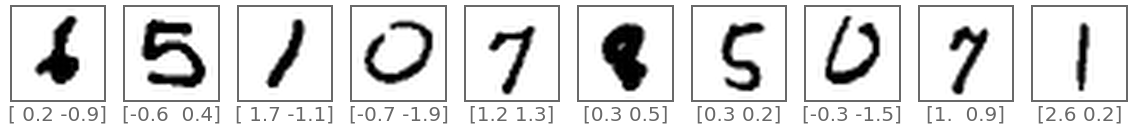

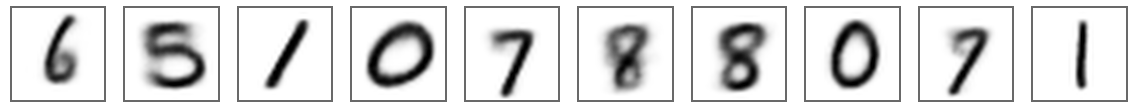

In [5]:
n_show = 10

# ---- Let's randomly select a few images

i_show = np.random.choice(range(len(x_data)), n_show)
x_show = x_data[i_show]

# ---- Get latent points and reconstructed images

z_mean, z_var, z  = vae.encoder.predict(x_show)
x_reconst         = vae.decoder.predict(z)

# ---- Just show it

labels=[ str(np.round(z[i],1)) for i in range(n_show) ]
pwk.plot_images(x_show,    labels, indices='all', columns=10, x_size=2,y_size=2, save_as='01-original')
pwk.plot_images(x_reconst, None  , indices='all', columns=10, x_size=2,y_size=2, save_as='02-reconstruct')


## Step 5 - Visualizing the latent space

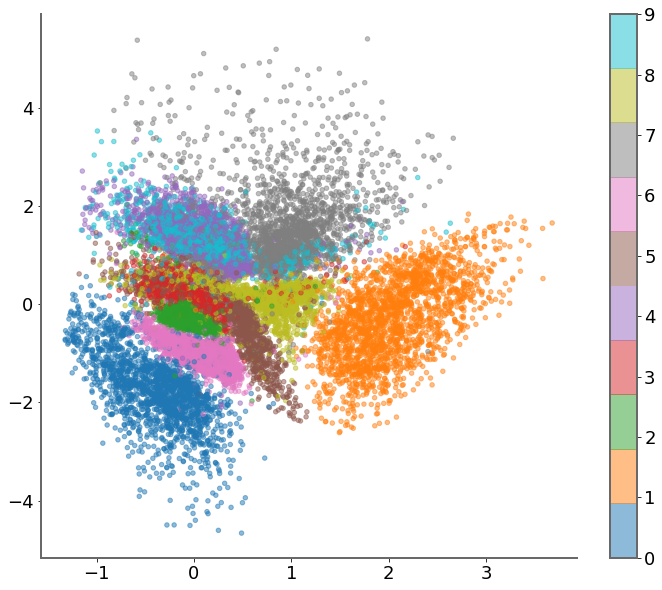

In [6]:
n_show = 20000

# ---- Let's randomly select some images

i_show = np.random.choice(range(len(x_data)), n_show)
x_show = x_data[i_show]
y_show = y_data[i_show]

# ---- Get latent points

z_mean, z_var, z = vae.encoder.predict(x_show)

fig = plt.figure(figsize=(12, 10))
plt.scatter(z[:, 0] , z[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=20)
plt.colorbar()
plt.show()

## Step 6 - Generate from latent space

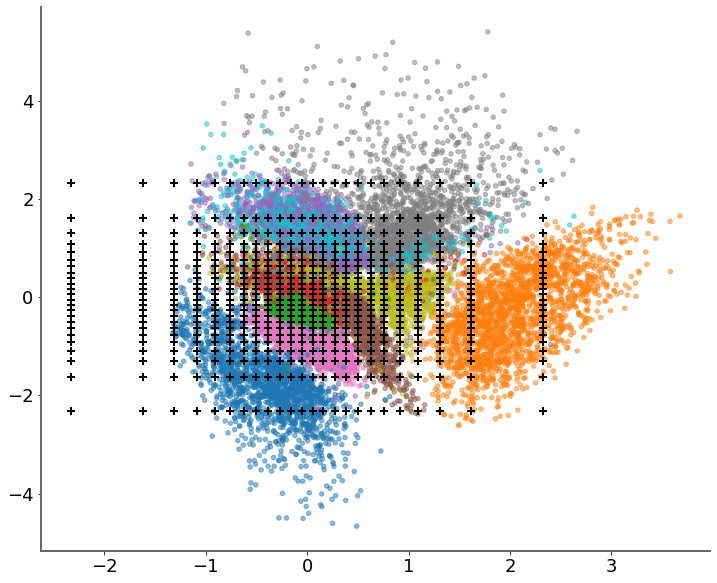

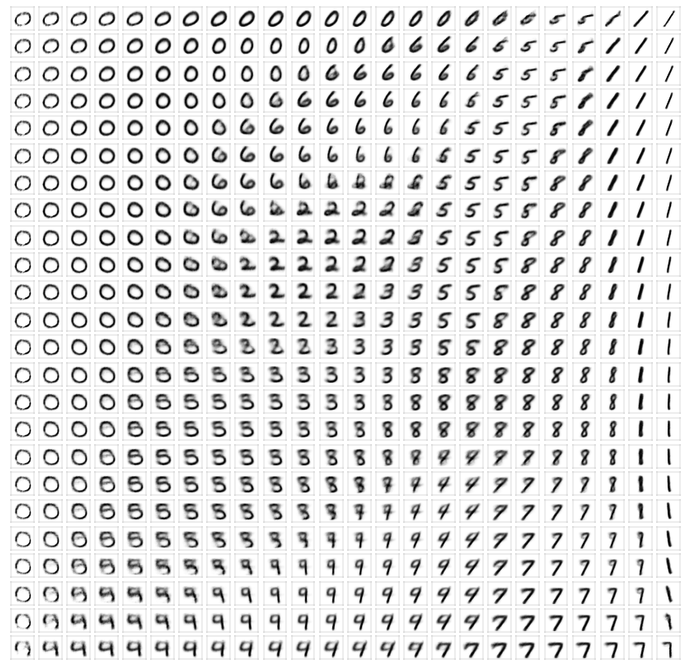

In [7]:
grid_size=24

# ---- Draw a ppf grid
#
grid=[]
for y in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
    for x in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
        grid.append( (x,y) )
grid=np.array(grid)

# ---- Draw latentspoints and grid

fig = plt.figure(figsize=(12, 10))
plt.scatter(z[:, 0] , z[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=20)
plt.scatter(grid[:, 0] , grid[:, 1], c = 'black', s=60, linewidth=2, marker='+', alpha=1)
plt.show()

# ---- Plot grid corresponding images

x_reconst = vae.decoder.predict([grid])
pwk.plot_images(x_reconst, indices='all', columns=grid_size, x_size=0.5,y_size=0.5, y_padding=0,spines_alpha=0.1)


In [8]:
pwk.end()

End time is : Tuesday 29 December 2020, 18:08:33
Duration is : 00:00:54 742ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>